In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

# Cutoff

In [2]:
r2_energy = json.loads(Path("nodes/r_max/2/PredictionMetrics/energy.json").read_text())
r3_energy = json.loads(Path("nodes/r_max/3/PredictionMetrics/energy.json").read_text())
r4_energy = json.loads(Path("nodes/r_max/4/PredictionMetrics/energy.json").read_text())
r5_energy = json.loads(Path("nodes/r_max/5/PredictionMetrics/energy.json").read_text())
r6_energy = json.loads(Path("nodes/r_max/6/PredictionMetrics/energy.json").read_text())

r2_forces = json.loads(Path("nodes/r_max/2/PredictionMetrics/forces.json").read_text())
r3_forces = json.loads(Path("nodes/r_max/3/PredictionMetrics/forces.json").read_text())
r4_forces = json.loads(Path("nodes/r_max/4/PredictionMetrics/forces.json").read_text())
r5_forces = json.loads(Path("nodes/r_max/5/PredictionMetrics/forces.json").read_text())
r6_forces = json.loads(Path("nodes/r_max/6/PredictionMetrics/forces.json").read_text())

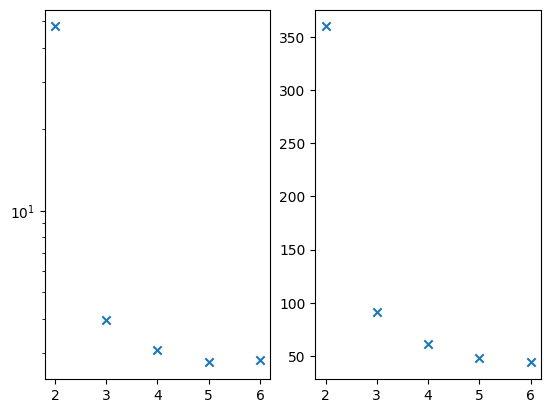

In [3]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter([2, 3, 4, 5, 6], [r2_energy["mae"], r3_energy["mae"], r4_energy["mae"], r5_energy["mae"], r6_energy["mae"]], marker="x")
ax[1].scatter([2, 3, 4, 5, 6], [r2_forces["mae"], r3_forces["mae"], r4_forces["mae"], r5_forces["mae"], r6_forces["mae"]], marker="x")
ax[0].set_yscale("log")

# NN

In [ ]:
nn_16_16_energy =  json.loads(Path("nodes/nn/16-16/PredictionMetrics/energy.json").read_text())
nn_16_16_forces =  json.loads(Path("nodes/nn/16-16/PredictionMetrics/forces.json").read_text())

nn_32_32_energy =  json.loads(Path("nodes/nn/32-32/PredictionMetrics/energy.json").read_text())
nn_32_32_forces =  json.loads(Path("nodes/nn/32-32/PredictionMetrics/forces.json").read_text())


# # for now mock with this data, TODO: use the correct data with the same r_max of 5.5!
# nn_128_128_energy =  json.loads(Path("nodes/r_max/5/PredictionMetrics/energy.json").read_text())
# nn_128_128_forces =  json.loads(Path("nodes/r_max/5/PredictionMetrics/forces.json").read_text())

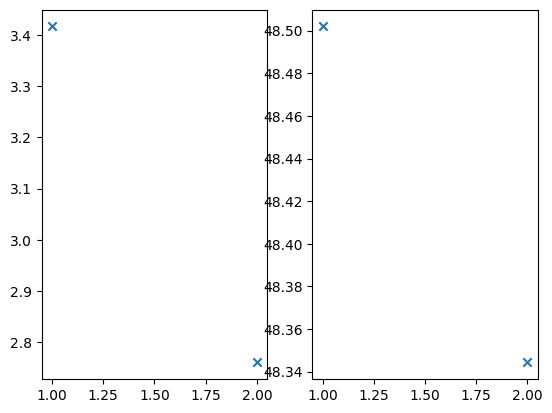

In [9]:
# do the same plot like above

fig, ax = plt.subplots(1, 2)
ax[0].scatter([1, 2], [nn_16_16_energy["mae"], nn_128_128_energy["mae"]], marker="x")
ax[1].scatter([1, 2], [nn_16_16_forces["mae"], nn_128_128_forces["mae"]], marker="x")
# ax[0].set_yscale("log")
